# Lab08 - Bài tập

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Perceptron

### Bài 1

Nghiên cứu mức thu nhập ($X$) và chi tiêu ($Y$) trong một tháng của một công ty. Khảo sát ngẫu nhiên 7 nhân viên, ta thu được bảng số liệu sau:

| X            | 130     | 150      | 133      | 170      | 170      | 210      | 230      |
| :----------: | :-----: | :------: | :------: | :------: | :------: | :------: | :------: |
| **Y**        | **84**  | **120**  | **108**  | **130**  | **130**  | **150**  | **160**  |


a. Dựa vào bảng dữ liệu trên cho biết có xây dựng được mô hình hồi quy hay không? Nếu có hãy xây dựng mô hình hồi quy để ước tính chi tiêu dựa theo thu nhập

b. Dự đoán mức chi tiêu của nhân viên công ty trên nếu biết thu nhập là 200$

In [46]:
data = pd.DataFrame(
    {"X": [130, 150, 133, 170, 170, 210, 230], "Y": [84, 120, 108, 130, 130, 150, 160]}
)

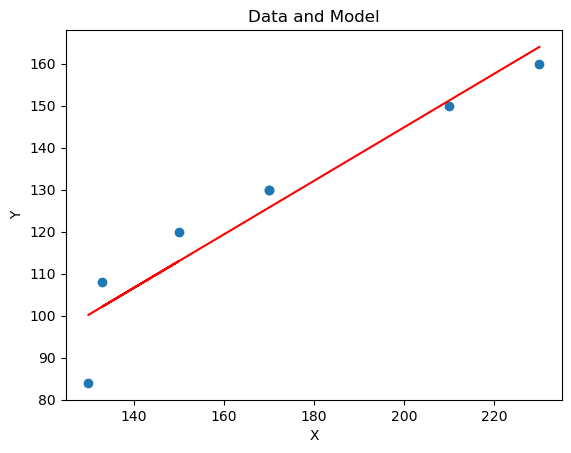

In [47]:
lr = LinearRegression()
lr.fit(data[["X"]], data["Y"])

# Vẽ dữ liệu và dự đoán của mô hình
plt.scatter(data["X"], data["Y"])
plt.plot(data["X"], lr.predict(data[["X"]]), color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data and Model")
plt.show()

In [48]:
data_test = pd.DataFrame({"X": [200]})
lr.predict(data_test)

array([144.86587521])

### Bài 2

Tiến hành nghiên cứu mối quan hệ giữa:

- X: giá bán kẻ của thịt gà (nghìn/kg) 
- Y: lượng thịt gà tiêu thụ (kg/tháng)

Dữ liệu thu được gồm 10 tháng như sau:

| X            | 35       | 40       | 45       | 40       | 38       | 40       | 45       | 30       | 42       | 38       |
| :----------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: |
| **Y**        | **2.29** | **2.04** | **0.59** | **2.06** | **2.50** | **2.32** | **1.57** | **3.96** | **1.43** | **2.34** |


a. Dựa vào bảng dữ liệu trên cho biết có xây dựng được mô hình hồi quy hay không? Nếu có hãy xây dựng mô hình hồi quy để ước tính lượng tiêu thụ thịt gà theo giá bán.

b. Dự đoán lượng tiêu thụ khi giá bán lẻ là 41(kg/tháng)

In [49]:
data = pd.DataFrame(
    {
        "X": [35, 40, 45, 40, 38, 40, 45, 30, 42, 38],
        "Y": [2.29, 2.04, 0.59, 2.06, 2.50, 2.32, 1.57, 3.96, 1.43, 2.34],
    }
)

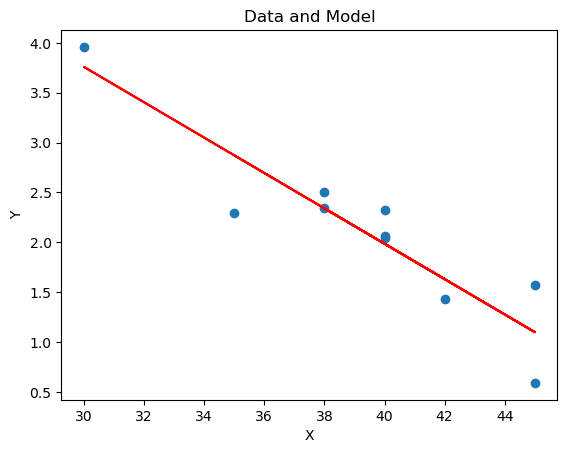

In [50]:
lr = LinearRegression()
lr.fit(data[["X"]], data["Y"])

# Vẽ dữ liệu và dự đoán của mô hình
plt.scatter(data["X"], data["Y"])
plt.plot(data["X"], lr.predict(data[["X"]]), color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data and Model")
plt.show()

In [51]:
data_test = pd.DataFrame({"X": [41]})
lr.predict(data_test)

array([1.80846238])

## Bài 3

Dụa trên file dữ liệu `Advertising.csv` bạn hãy dự đoán doanh số bán hàng (`sales`) dựa trên số tiền chi cho các nền tảng tiếp thị khác nhau như `TV`, `Radio` và `Newspaper`

a. Đọc file dữ liệu cho biết các thông tin cơ bản về dữ liệu: kích thước, dữ liệu có giá trị trống hay không, hiện các giá trị thống kê cơ bản của các thuộc tính.

b. Để dự đoán doanh số bằng phương pháp hồi quy tuyến tính đơn giản (Simple Linear Regression) trước tiên cần lựa chọn một trong các thuộc tính còn lại. Theo bạn thuộc tính nào phù hợp để xây dựng mô hình hồi quy. Giải thích và minh họa bằng 2 cách

c. Xây dụng phương trình hồi quy, trực quan mô hình (đường thẳng) tìm được. Theo bạn để đánh giá mô hình trên cần dùng đại lượng nào?

---

In [52]:
# Đọc dữ liệu từ file csv
df = pd.read_csv("data/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [53]:
# Kiểm tra dữ liệu trống
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [54]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


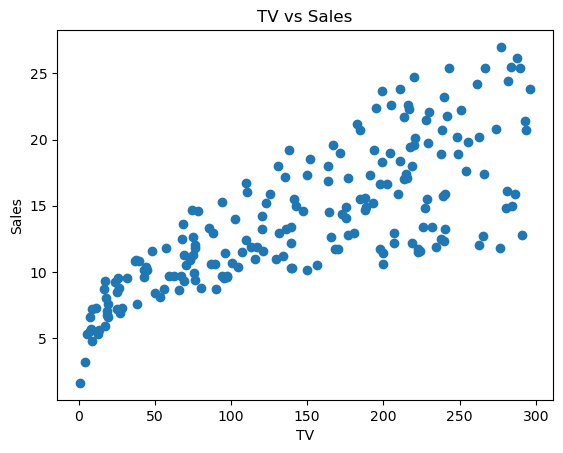

Correlation: 0.7822244248616061


In [55]:
"""
b. Để dự đoán doanh số bằng phương pháp hồi quy tuyến tính đơn giản (Simple Linear Regression)
trước tiên cần lựa chọn một trong các thuộc tính còn lại. 
Theo bạn thuộc tính nào phù hợp để xây dựng mô hình hồi quy. Giải thích và minh họa bằng 2 cách
"""

"""
Chon thuoc tinh TV de xay dung mo hinh hoi quy vi co moi quan he tuyen tinh giua TV va sales
Vì có mối quan hệ tuyến tính giữa TV và sales

"""

X = df[["TV"]].values
Y = df["sales"].values

# Minh họa bằng đồ thị
plt.scatter(X, Y)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("TV vs Sales")
plt.show()

# Minh họa bằng tính hệ số tương quan Pearson
print(f"Correlation: {np.corrcoef(X.T, Y.T)[0, 1]}")

Ta thấy hệ số tương quan là: __0.78227__ cho thấy 2 biến x, y có tương quan tuyến tính mạnh. Vì vậy, có thể xây dựng mô hình hồi quy tuyến tính cho 2 biến x, y

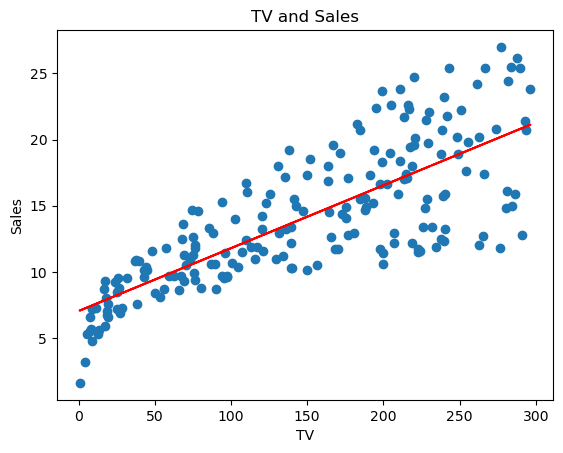

In [56]:
# Khởi tạo mô hình hồi quy tuyến tính
regressor = LinearRegression()

# Huấn luyện mô hình
regressor.fit(X, Y)

# Dự đoán giá trị
Y_pred = regressor.predict(X)

# Vẽ đồ thị
plt.scatter(X, Y)
plt.plot(X, regressor.predict(X), color="red")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("TV and Sales")
plt.show()

In [57]:
"""
c. Xây dụng phương trình hồi quy, trực quan mô hình (đường thẳng) tìm được. 
Theo bạn để đánh giá mô hình trên cần dùng đại lượng nào?
"""

"""
Dùng đại lượng Mean Squared Error (MSE) để đánh giá mô hình.
"""

mean_squared_error(Y, Y_pred)

10.512652915656759